In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(os.getcwd())

C:\Users\antoi\P6OC - Lapage


# Table des matières


# [1. Prise en main des données](#H10)
## [1.1 Les données clients](#H11)
## [1.2 Les données produits](#H12)
## [1.3 Les données transactions](#H13)

# [2. Les demandes d'Antoine](#H20)
## [2.1 ](#H21)



# Prise en main des données<a name='H10'></a>

## 1.1 Les données clients <a name="H11"></a>

In [2]:
customers_df = pd.read_csv("Data/customers.csv", sep=',', header=0)

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
customers_df.head(5)

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [5]:
customers_df.duplicated(subset=['client_id']).sum()

0

In [6]:
customers_df_copy = customers_df.copy()
customers_df_copy.set_index(['client_id'], inplace = True)
customers_df_copy.filter(regex='^[c]\_.+$', axis = 0)

sex  birth
client_id           
c_4410      f   1967
c_7839      f   1975
c_1699      f   1984
c_5961      f   1962
c_5320      m   1943
...        ..    ...
c_7920      m   1956
c_7403      f   1970
c_5119      m   1974
c_5643      f   1968
c_84        f   1982

[8621 rows x 2 columns]

In [7]:
# Jointure pour identifier les clients qui ne respectent pas la notation 'c_id'

join_client_id = pd.merge(customers_df, customers_df_copy.filter(regex='^[c]\_.+$', axis = 0), on='client_id', how='outer', indicator=True)
join_client_id.loc[join_client_id['_merge'] == 'left_only']

client_id sex_x  birth_x sex_y  birth_y     _merge
2735      ct_0     f     2001   NaN      NaN  left_only
8494      ct_1     m     2001   NaN      NaN  left_only

In [8]:
# Supprimer les clients test de notre Analyse
index = join_client_id.loc[join_client_id['_merge'] == 'left_only'].index
customers_df.drop(labels= index, axis='index', inplace=True)

In [9]:
# Transformer les client_id en integer (facultatif)
customers_df['client_id'] = customers_df['client_id'].apply(lambda x : x.split('_')[1])
customers_df['client_id'] = pd.to_numeric(customers_df['client_id'])

In [10]:
customers_df.dtypes

client_id     int64
sex          object
birth         int64
dtype: object

In [11]:
# Traitement des valeurs nulles après conversion des id en string
customers_df.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [12]:
def oneD_analysis(df, var_list = 'all', quant = False, columns = 2):
    
    
    if len(var_list) % 2 == 0 :
        row = int(len(var_list) / 2)
    else :
        row = int(len(var_list) / 2) + 1
    
    if var_list == 'all':
        var_list = df.columns
    ax_i=0
    ax_j=0
             
    if quant :
        row = len(var_list)
        if row == 1 :
            sns.boxplot(x = df[var_list[0]])
        else : 
            fig, axes = plt.subplots(row, figsize=(8,6))
            for var in var_list :  
                sns.boxplot(x = df[var], ax = axes[ax_i])
                ax_i+=1
            
    else :
        fig, axes = plt.subplots(row, columns, figsize=(8,6)) 
        for var in var_list :      
            if (ax_i % 2 == 0) & (ax_i != 0) :
                ax_i = 0
                ax_j+=1

            data = pd.DataFrame(df[var].value_counts())
            missing_value = df.shape[0] - data[var].sum()
            data = data.append(pd.DataFrame({var : missing_value}, index=['missing_value']))
            try :
                sns.barplot(x=data.index, y = var, data = data, ax=axes[ax_j,ax_i])
                
            except :
                sns.barplot(x=data.index, y = var, data = data, ax=axes[ax_i])
                
            ax_i+=1
        
    

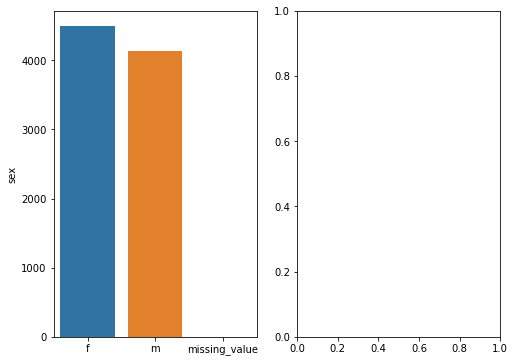

In [13]:
oneD_analysis(customers_df,['sex'])

In [14]:
# Aucune valeur abérante pour notre variable date 
oneD_analysis(customers_df, ['birth'], quant = True)

In [15]:
customers_df.birth.describe()

count    8621.000000
mean     1978.275606
std        16.917958
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64

## 1.2 Les données produits <a name="H12"></a>

In [16]:
product_df = pd.read_csv('Data/products.csv', sep=',', header=0)

In [17]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [18]:
# Vérifier qu'un produit est enregistré une seule fois dans notre base de données
product_df.duplicated(subset=['id_prod']).sum()

0

In [19]:
# c2_58473
# Etude sur les catégories 
product_df['categ'].value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

In [20]:

for categ in product_df['categ'].value_counts().index :
    print('Duplicated data for categ {} : {}'.format(categ,product_df.loc[product_df['id_prod'] == categ, 'id_prod'].duplicated().sum()))

Duplicated data for categ 0 : 0
Duplicated data for categ 1 : 0
Duplicated data for categ 2 : 0


In [21]:
#Retypage de id_prod
pd.to_numeric(product_df['id_prod'].apply(lambda x : ''.join(x.split('_'))), errors='raise')

ValueError: Unable to parse string "T0" at position 731

In [22]:
# Identifier les produits labellisés T0
product_id_integer = pd.to_numeric(product_df['id_prod'].apply(lambda x : ''.join(x.split('_'))), errors='coerce')
product_df.loc[product_id_integer.isna(),:]

id_prod  price  categ
731     T_0   -1.0      0

In [23]:
product_df.head(5)

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [24]:
# On ne compte pas les produits test dans notre analyse
# On supprime les id_prod sous la forme T_0
index = product_df.loc[product_id_integer.isna(),:].index
product_df.drop(labels = index , axis='index', inplace=True)

In [25]:
product_df.loc[product_id_integer.isna(),:]

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

In [26]:
# id_prod : valeur manquantes

In [27]:
# Test sur les doublons avant de convertir en integer
product_df['id_prod'].astype(np.int64).duplicated().sum()

978

In [28]:
product_df.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [29]:
oneD_analysis(product_df,['price'], quant=True)

## 1.3 Les données de transactions <a name="H13"></a>

In [30]:
transaction_df = pd.read_csv('Data/transactions.csv', sep=',', header=0)

In [31]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [32]:
# Transformation des ids client et produit en int conformément aux modifications sur product_df et client_df
transaction_df.head(5)

id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

In [33]:
transaction_df['session_id'].duplicated().sum()

337216

In [34]:
transaction_df.loc[transaction_df['client_id'] == 'c_103']

id_prod                        date session_id client_id
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
6451    0_1627  2022-06-18 05:55:31.816994   s_225494     c_103
6791    0_1104  2023-02-08 17:31:06.898425   s_338755     c_103
7952    0_1390  2021-04-20 06:18:39.939761    s_23078     c_103
8805    0_1547  2022-03-15 19:54:53.904123   s_179629     c_103
...        ...                         ...        ...       ...
659439  0_2044  2021-04-15 19:44:00.855726    s_21059     c_103
659628  0_2129  2022-09-07 19:10:12.295924   s_264739     c_103
665064  0_1672  2022-01-15 19:25:49.989763   s_150318     c_103
665701  0_1636  2022-10-19 07:32:23.140487   s_284714     c_103
678329   1_550  2021-06-21 15:23:36.835618    s_51793     c_103

[195 rows x 4 columns]

In [35]:
# s_0 : session test associée aux ct_0 et ct_1
transaction_df.groupby(by=['session_id','client_id']).count()

id_prod  date
session_id client_id               
s_0        ct_0           106   106
           ct_1            94    94
s_1        c_329            1     1
s_10       c_2218           1     1
s_100      c_3854           2     2
...                       ...   ...
s_99994    c_7685           3     3
s_99995    c_4170           1     1
s_99996    c_4900           4     4
s_99997    c_3521           1     1
s_99998    c_2795           3     3

[342317 rows x 2 columns]

In [36]:
# Une session est unique appartient à un seul client et peut aboutir à l'achat d'un ou plusieurs produits
# count_unique : > 1 = session test
# Tracer les transactions dans le temps par catégorie de produit

In [37]:
transaction_df['session_id'].value_counts()

s_0         200
s_118668     14
s_342045     13
s_21005      13
s_179575     13
           ... 
s_138968      1
s_9809        1
s_259798      1
s_138914      1
s_260731      1
Name: session_id, Length: 342316, dtype: int64

In [53]:
transaction_df.loc[transaction_df['client_id'] == 'ct_1' ]

id_prod                             date session_id client_id
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
23678      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_1
27778      T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
35433      T_0  test_2021-03-01 02:30:02.237418        s_0      ct_1
38646      T_0  test_2021-03-01 02:30:02.237445        s_0      ct_1
...        ...                              ...        ...       ...
648864     T_0  test_2021-03-01 02:30:02.237420        s_0      ct_1
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[94 rows x 4 columns]

In [54]:
transaction_df.loc[transaction_df['id_prod'] == 'T_0' ]

id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]

In [152]:
transaction_df['date'].max()

'test_2021-03-01 02:30:02.237450'

In [39]:
# On remarque que certain produit ne figurent pas dans la table transaction
# Certain livre sont exclusivement vendu en boutique
transaction_df.id_prod.nunique()

3267

In [127]:
transaction_product_df = pd.merge(transaction_df, product_df.set_index('id_prod'), on='id_prod', how = 'inner')
transaction_df_product_sells = transaction_product_df.copy()[['id_prod', 'date','price']]

In [128]:
transaction_df_product_sells.dtypes

id_prod     object
date        object
price      float64
dtype: object

In [129]:
transaction_df_product_sells.iloc[1]

id_prod                        0_1518
date       2021-09-26 12:37:29.780414
price                            4.18
Name: 1, dtype: object

In [130]:
# convertir la variable date en type date

pd.to_datetime(arg = transaction_df_product_sells['date'], format='%Y-%m-%d', errors='raise')

0        2022-05-20 13:21:29.043970
1        2021-09-26 12:37:29.780414
2        2021-05-06 17:14:43.117440
3        2022-03-16 18:57:10.420103
4        2022-11-12 18:58:10.574853
                    ...            
679106   2021-06-23 06:50:48.888907
679107   2021-12-24 04:37:46.407713
679108   2021-10-16 09:19:09.546713
679109   2021-03-17 03:34:14.461358
679110   2021-09-27 23:22:40.394509
Name: date, Length: 679111, dtype: datetime64[ns]

In [131]:
# Supprimer les transactions test liées aux produits test grâce à l'identifiant T_0
transaction_df_product_sells.loc[transaction_df_product_sells['id_prod'] == 'T_0']
index = transaction_df_product_sells.loc[transaction_df_product_sells['id_prod'] == 'T_0', 'id_prod'].index
transaction_df_product_sells.drop(labels = index, axis = 'index', inplace = True)

In [132]:
from datetime import datetime

transaction_df_product_sells['date'] = pd.to_datetime(arg = transaction_df_product_sells['date'], format='%Y-%m-%d', errors='raise')
transaction_df_product_sells['date'] = transaction_df_product_sells['date'].apply(lambda x : datetime(x.year, x.month, x.day))

In [133]:
# Fonction pour créer la colonne categorie de produit à partir de l'id
transaction_df_product_sells['categ'] = transaction_df_product_sells['id_prod'].apply(lambda x : x.split('_')[0])

In [148]:
data = transaction_df_product_sells.groupby(by=['date','categ']).agg({'price' : 'sum',
                                                                     'id_prod' : 'count'}).reset_index().rename(columns={'id_prod' : 'nb_vente',
                                                                                                                        'price' : 'ca'})

In [149]:
data

date categ       ca  nb_vente
0    2021-03-01     0  6262.65       581
1    2021-03-01     1  6811.53       335
2    2021-03-01     2  3491.04        46
3    2021-03-02     0  6718.27       620
4    2021-03-02     1  5627.15       276
...         ...   ...      ...       ...
2159 2023-02-27     1  6461.76       332
2160 2023-02-27     2  5271.62        75
2161 2023-02-28     0  4901.86       472
2162 2023-02-28     1  9226.25       439
2163 2023-02-28     2  3977.04        50

[2164 rows x 4 columns]

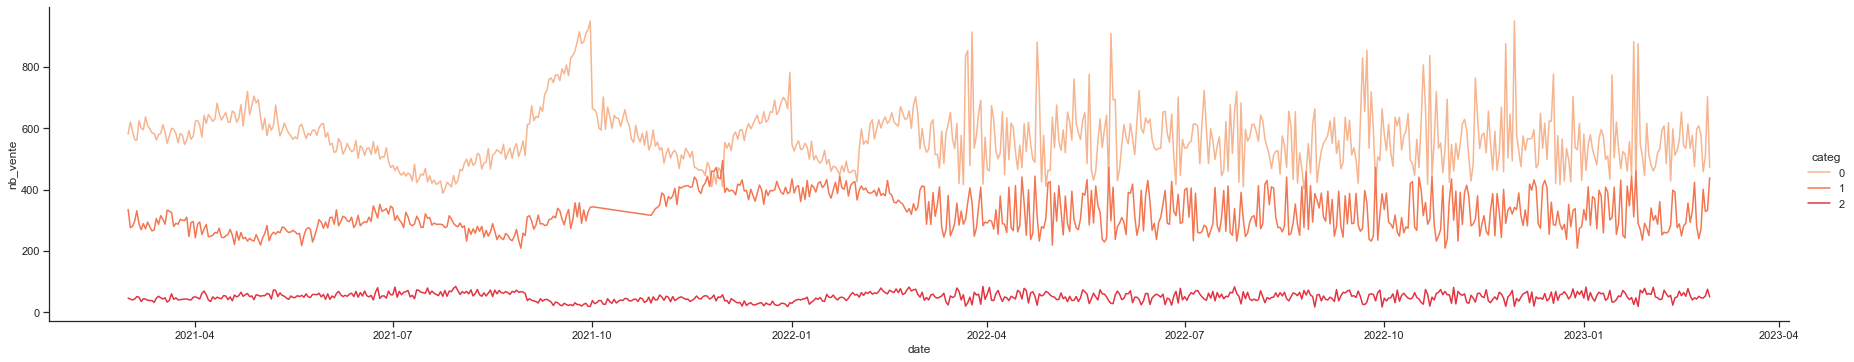

In [147]:
# Etudier les ventes des produits par catégorie dans le temps
import seaborn as sns


sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")[:3]

# Plot the lines on two facets
sns.relplot(
    data=data,
    x="date", y="nb_vente",
    hue="categ",
    kind="line",
    palette=palette,
    height=5, aspect=5,
)

## 2. Analyse de performance des ventes en ligne <a name = "H20"></a>

## 2.1 Evolution du chiffre d'affaire pour l'activité 2018-2021

In [153]:
# Indicateur statistiques (moyenne, mediane, écart-type, variance) 

In [120]:
# Jointure entre le df product id et transaction 

In [121]:
# Chiffre d'affaire global et par catégorie
transaction_product_df = pd.merge(transaction_df, product_df.set_index('id_prod'), on='id_prod', how = 'inner')

In [122]:
transaction_product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 36.3+ MB


In [123]:
def func(pct, df):
    ca_total = df.sum()
    absolute = int(np.round(pct/100. * ca_total))
    return "{:.1f}%\n({:d} €)".format(pct, absolute)

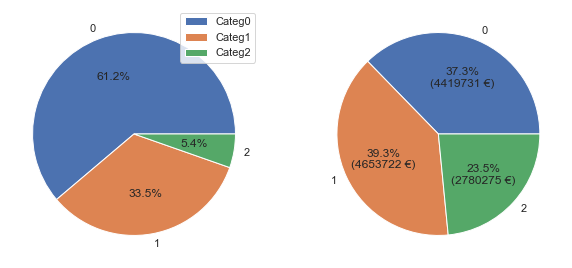

In [124]:
# Chiffre d'affaire VS nombre de vente par catégorie
data = transaction_product_df.categ.value_counts(normalize = True)
ca_categ = transaction_product_df.groupby(by=['categ']).sum()

fig, axes = plt.subplots(1,2,figsize=(10,8))
axes[0].pie(x=data, labels = data.index, autopct = "%1.1f%%")
axes[0].legend(labels=['Categ0', 'Categ1', 'Categ2'])
axes[1].pie(x=ca_categ['price'], labels=ca_categ.index, autopct = lambda pct : func(pct,ca_categ))
#plt.title("Proportion du nombre de vente par produit")
plt.show()

In [ ]:
# Croiser les variables 

In [125]:
transaction_product_df

id_prod                        date session_id client_id  price  categ
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   4.18      0
1       0_1518  2021-09-26 12:37:29.780414    s_95811    c_6197   4.18      0
2       0_1518  2021-05-06 17:14:43.117440    s_30782     c_682   4.18      0
3       0_1518  2022-03-16 18:57:10.420103   s_180057    c_5932   4.18      0
4       0_1518  2022-11-12 18:58:10.574853   s_296584    c_7217   4.18      0
...        ...                         ...        ...       ...    ...    ...
679106  0_1279  2021-06-23 06:50:48.888907    s_52563    c_1025  20.99      0
679107  0_1683  2021-12-24 04:37:46.407713   s_139091    c_5508   2.99      0
679108  0_1379  2021-10-16 09:19:09.546713   s_105547    c_5425   2.99      0
679109   0_886  2021-03-17 03:34:14.461358     s_7410    c_7219  21.82      0
679110   0_833  2021-09-27 23:22:40.394509    s_96558    c_8260   2.99      0

[679111 rows x 6 columns]

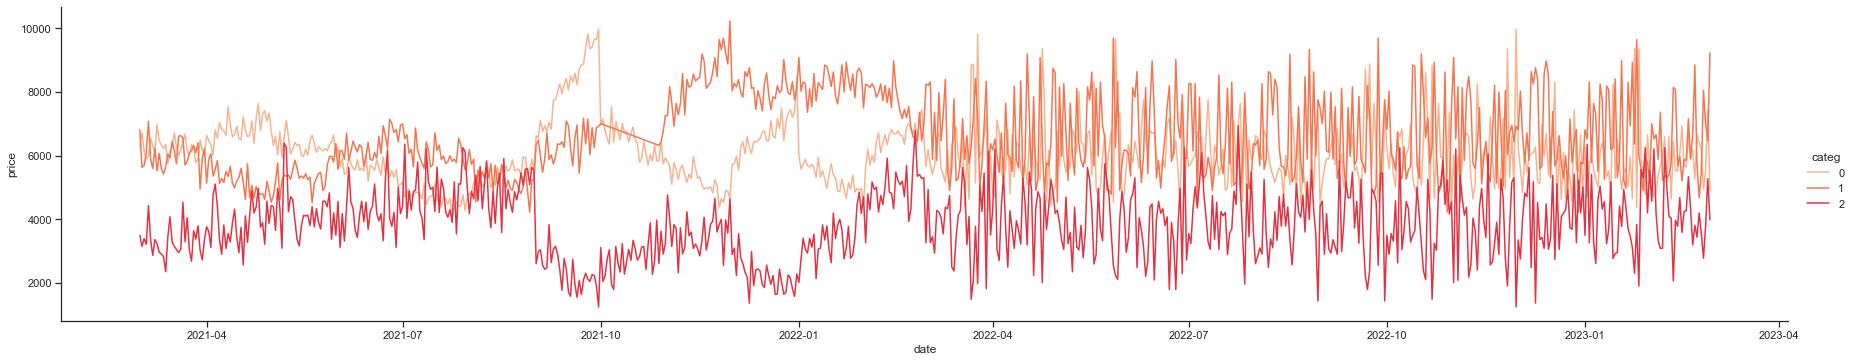

In [142]:
# Evolution du CA par catégorie de produit

import seaborn as sns


sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")[:3]

# Plot the lines on two facets
sns.relplot(
    data=data,
    x="date", y="price",
    hue="categ",
    kind="line",
    palette=palette,
    height=5, aspect=5,
)

In [ ]:
# Croiser les données clients avec le nombre de vente et chiffre d'affaire
# Croiser l'âge avec les ventes, le sexe avec les ventes
# Croiser l'âge et la categorie
